In [1]:
%load_ext autoreload
%autoreload 2

# Problem 1

In [2]:
import numpy as np

X, Y = np.load('data/lab4.p', allow_pickle=True)

As in the previous lab, we convert the data samples to a canonical data structutre better suited for classification.

In [3]:
from utils import normalize_data

x_train, x_test, y_train, y_test = normalize_data(X, Y)

## Parzen classifier

In [4]:
from utils import error_score, accuracy_score
from models import ParzenClassifier

for kernel in ['gaussian','tophat','epanechnikov','exponential','linear','cosine']:
    for h in [0.1, 5.0]:
        model = ParzenClassifier(h=h, kernel=kernel)
        model.fit(x_train, y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        reclassification_error = error_score(y_pred_train, y_train)
        test_error = error_score(y_pred_test, y_test)

        print(f'[{h=}, {kernel=}] {reclassification_error = :.1%}  {test_error = :.1%}')

[h=0.1, kernel='gaussian'] reclassification_error = 1.0%  test_error = 11.5%
[h=5.0, kernel='gaussian'] reclassification_error = 6.0%  test_error = 9.0%
[h=0.1, kernel='tophat'] reclassification_error = 0.5%  test_error = 38.5%
[h=5.0, kernel='tophat'] reclassification_error = 7.5%  test_error = 10.0%
[h=0.1, kernel='epanechnikov'] reclassification_error = 0.5%  test_error = 38.5%
[h=5.0, kernel='epanechnikov'] reclassification_error = 6.0%  test_error = 9.5%
[h=0.1, kernel='exponential'] reclassification_error = 1.0%  test_error = 11.0%
[h=5.0, kernel='exponential'] reclassification_error = 4.5%  test_error = 9.0%
[h=0.1, kernel='linear'] reclassification_error = 0.5%  test_error = 38.5%
[h=5.0, kernel='linear'] reclassification_error = 5.0%  test_error = 9.5%
[h=0.1, kernel='cosine'] reclassification_error = 0.5%  test_error = 38.5%
[h=5.0, kernel='cosine'] reclassification_error = 6.0%  test_error = 9.5%


We see that the best performing kernel functions for this particular classification task are the `gaussian` and the `exponential` ones. For these kernels, the results are similar to what we obtained in the previous lab.

## Quadratic Discriminant Analysis classifier 

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

model = QDA()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
reclassification_error = error_score(y_pred_train, y_train)
test_error = error_score(y_pred_test, y_test)

print(f'{reclassification_error = :.1%}  {test_error = :.1%}')

reclassification_error = 4.5%  test_error = 10.0%


In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print(f'Reclassification confusion matrix : \n {cm_train} \n')
print(f'Testing confusion matrix : \n {cm_test}')

Reclassification confusion matrix : 
 [[116   4]
 [  5  75]] 

Testing confusion matrix : 
 [[112   8]
 [ 12  68]]


## Nearest Neighbours classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

for kn in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=kn)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    reclassification_error = error_score(y_pred_train, y_train)
    test_error = error_score(y_pred_test, y_test)

    print(f'[{kn = }] {reclassification_error = :.1%}  {test_error = :.1%}')

[kn = 1] reclassification_error = 0.0%  test_error = 11.0%
[kn = 2] reclassification_error = 4.0%  test_error = 11.5%
[kn = 3] reclassification_error = 3.5%  test_error = 11.0%
[kn = 4] reclassification_error = 3.5%  test_error = 11.5%
[kn = 5] reclassification_error = 3.0%  test_error = 10.0%
[kn = 6] reclassification_error = 3.0%  test_error = 10.5%
[kn = 7] reclassification_error = 4.5%  test_error = 11.0%
[kn = 8] reclassification_error = 4.0%  test_error = 10.5%
[kn = 9] reclassification_error = 4.5%  test_error = 9.5%
[kn = 10] reclassification_error = 5.0%  test_error = 10.5%


As was already shown in the previous assignment, we get similar results with our implementation as with sklearn's one.

## Cross validation

In [9]:
from sklearn.model_selection import cross_validate

scores = cross_validate(QDA(), x_train, y_train, cv=5)
mean_score = np.mean(scores["test_score"])
std_score = 2 * np.std(scores["test_score"])

print(f'{mean_score = :.1%} {std_score = :.1%}')

mean_score = 94.0% std_score = 6.8%


In [10]:
for kn in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=kn)
    scores = cross_validate(model, x_train, y_train, cv=5)
    mean_score = np.mean(scores["test_score"])
    std_score = 2 * np.std(scores["test_score"])
    print(f'[{kn = }] {mean_score = :.1%} {std_score = :.1%}')

[kn = 1] mean_score = 94.5% std_score = 8.0%
[kn = 2] mean_score = 92.0% std_score = 4.9%
[kn = 3] mean_score = 96.0% std_score = 8.7%
[kn = 4] mean_score = 95.5% std_score = 5.8%
[kn = 5] mean_score = 94.5% std_score = 8.6%
[kn = 6] mean_score = 93.0% std_score = 7.3%
[kn = 7] mean_score = 94.0% std_score = 6.8%
[kn = 8] mean_score = 94.5% std_score = 4.9%
[kn = 9] mean_score = 94.0% std_score = 6.8%
[kn = 10] mean_score = 93.5% std_score = 6.0%


There seems to be a tendency for the standard deviation to decrease with the number of neighbours.

## Grid search

In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors' : range(1, 11),
    'algorithm' : ('ball_tree', 'kd_tree')
}

model = KNeighborsClassifier()
grid = GridSearchCV(model, params, cv=5)
grid.fit(x_train, y_train)

print(f'Best parameters : {grid.best_params_} \nCross validation score : {grid.best_score_:.1%}')

model = KNeighborsClassifier(**grid.best_params_)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)

print(f'Test score : {score:.1%}')

Best parameters : {'algorithm': 'ball_tree', 'n_neighbors': 3} 
Cross validation score : 96.0%
Test score : 89.0%


# Problem 2

## Using keras

With such a small dataset, neural networks are hard to tune. Since samples only have two features, we observe strong overfitting as soon as we add too much nodes or hidden layers. One solution would be to use dropout, but since we want as few layers as possible it is preferable to use kernel regularization.

In [26]:
import tensorflow as tf
import os
import random

# enable reproducibility
SEED = 42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

x_train_norm = tf.keras.utils.normalize(x_train)
x_test_norm = tf.keras.utils.normalize(x_test)

y_train_norm = y_train - 1
y_test_norm = y_test - 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.5)),
    tf.keras.layers.Dense(2, activation='softmax')
])

compile_params = {
    'optimizer': tf.keras.optimizers.Adam(learning_rate=1e-3),
    'loss' : 'sparse_categorical_crossentropy',
    'metrics' : ['sparse_categorical_accuracy'],
}

train_params = {
    'validation_data' : (x_test_norm, y_test_norm),
    'epochs' : 200,
    'batch_size': 10,
}

model.compile(**compile_params)
history = model.fit(x_train_norm, y_train_norm, **train_params)
model.evaluate(x_test_norm, y_test_norm)

_, test_acc = model.evaluate(x_test_norm, y_test_norm)
print(f'Test accuracy : {test_acc:.1%}')

Train on 200 samples, validate on 200 samples
Epoch 1/200
200/200 [==============================] - 0s 2ms/sample - loss: 1.6103 - sparse_categorical_accuracy: 0.6000 - val_loss: 1.5673 - val_sparse_categorical_accuracy: 0.6000
Epoch 2/200
200/200 [==============================] - 0s 404us/sample - loss: 1.5264 - sparse_categorical_accuracy: 0.6000 - val_loss: 1.4896 - val_sparse_categorical_accuracy: 0.6000
Epoch 3/200
200/200 [==============================] - 0s 1ms/sample - loss: 1.4488 - sparse_categorical_accuracy: 0.6000 - val_loss: 1.4177 - val_sparse_categorical_accuracy: 0.6000
Epoch 4/200
200/200 [==============================] - 0s 344us/sample - loss: 1.3775 - sparse_categorical_accuracy: 0.6000 - val_loss: 1.3531 - val_sparse_categorical_accuracy: 0.6000
Epoch 5/200
200/200 [==============================] - 0s 356us/sample - loss: 1.3134 - sparse_categorical_accuracy: 0.6000 - val_loss: 1.2946 - val_sparse_categorical_accuracy: 0.6000
Epoch 6/200
200/200 [============

Epoch 45/200
200/200 [==============================] - 0s 361us/sample - loss: 0.5275 - sparse_categorical_accuracy: 0.8750 - val_loss: 0.5697 - val_sparse_categorical_accuracy: 0.8350
Epoch 46/200
200/200 [==============================] - 0s 269us/sample - loss: 0.5219 - sparse_categorical_accuracy: 0.8750 - val_loss: 0.5656 - val_sparse_categorical_accuracy: 0.8350
Epoch 47/200
200/200 [==============================] - 0s 273us/sample - loss: 0.5175 - sparse_categorical_accuracy: 0.8700 - val_loss: 0.5622 - val_sparse_categorical_accuracy: 0.8350
Epoch 48/200
200/200 [==============================] - 0s 217us/sample - loss: 0.5132 - sparse_categorical_accuracy: 0.8700 - val_loss: 0.5583 - val_sparse_categorical_accuracy: 0.8350
Epoch 49/200
200/200 [==============================] - 0s 243us/sample - loss: 0.5084 - sparse_categorical_accuracy: 0.8800 - val_loss: 0.5540 - val_sparse_categorical_accuracy: 0.8400
Epoch 50/200
200/200 [==============================] - 0s 409us/sampl

200/200 [==============================] - 0s 381us/sample - loss: 0.4155 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.4794 - val_sparse_categorical_accuracy: 0.8850
Epoch 90/200
200/200 [==============================] - 0s 389us/sample - loss: 0.4139 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.4786 - val_sparse_categorical_accuracy: 0.8850
Epoch 91/200
200/200 [==============================] - 0s 257us/sample - loss: 0.4124 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.4776 - val_sparse_categorical_accuracy: 0.8850
Epoch 92/200
200/200 [==============================] - 0s 361us/sample - loss: 0.4117 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.4759 - val_sparse_categorical_accuracy: 0.8900
Epoch 93/200
200/200 [==============================] - 0s 354us/sample - loss: 0.4098 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.4758 - val_sparse_categorical_accuracy: 0.8850
Epoch 94/200
200/200 [==============================] - 0s 342us/sample - loss: 0.4

Epoch 133/200
200/200 [==============================] - 0s 331us/sample - loss: 0.3669 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.4437 - val_sparse_categorical_accuracy: 0.8950
Epoch 134/200
200/200 [==============================] - 0s 367us/sample - loss: 0.3657 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.4416 - val_sparse_categorical_accuracy: 0.8950
Epoch 135/200
200/200 [==============================] - 0s 351us/sample - loss: 0.3643 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.4409 - val_sparse_categorical_accuracy: 0.8950
Epoch 136/200
200/200 [==============================] - 0s 315us/sample - loss: 0.3635 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.4410 - val_sparse_categorical_accuracy: 0.8950
Epoch 137/200
200/200 [==============================] - 0s 370us/sample - loss: 0.3631 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.4412 - val_sparse_categorical_accuracy: 0.8950
Epoch 138/200
200/200 [==============================] - 0s 389us

Epoch 177/200
200/200 [==============================] - 0s 309us/sample - loss: 0.3349 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.4215 - val_sparse_categorical_accuracy: 0.8950
Epoch 178/200
200/200 [==============================] - 0s 252us/sample - loss: 0.3362 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.4187 - val_sparse_categorical_accuracy: 0.8850
Epoch 179/200
200/200 [==============================] - 0s 304us/sample - loss: 0.3342 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.4201 - val_sparse_categorical_accuracy: 0.8950
Epoch 180/200
200/200 [==============================] - 0s 393us/sample - loss: 0.3331 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.4189 - val_sparse_categorical_accuracy: 0.8900
Epoch 181/200
200/200 [==============================] - 0s 303us/sample - loss: 0.3327 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.4188 - val_sparse_categorical_accuracy: 0.8950
Epoch 182/200
200/200 [==============================] - 0s 290us

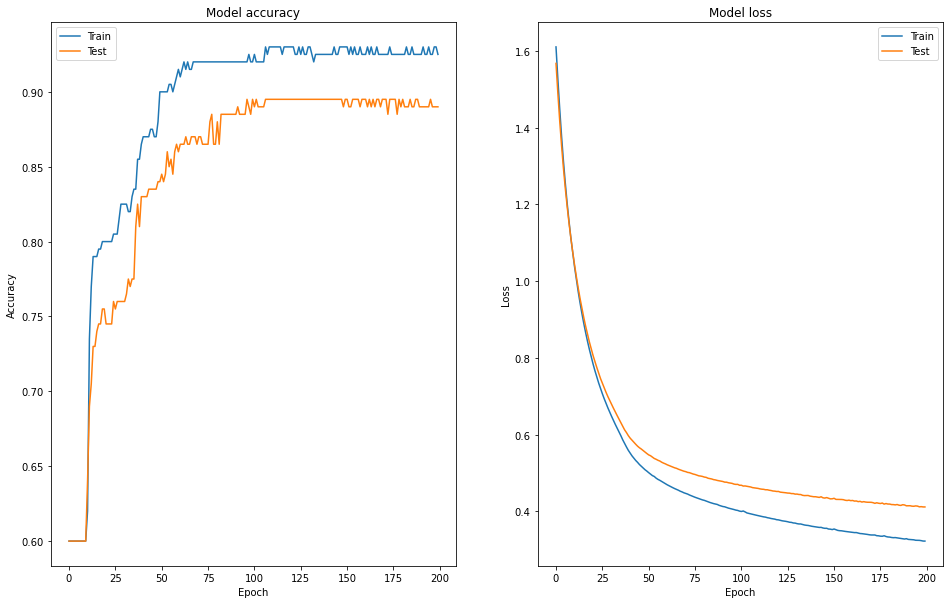

In [27]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

records = history.history
fig, ax = plt.subplots(1, 2)

ax[0].plot(records["sparse_categorical_accuracy"], label="Train")
ax[0].plot(records["val_sparse_categorical_accuracy"], label="Test")
ax[0].set(xlabel="Epoch", ylabel="Accuracy", title="Model accuracy")
ax[0].legend(loc="upper left")

ax[1].plot(records["loss"], label="Train")
ax[1].plot(records["val_loss"], label="Test")
ax[1].set(xlabel="Epoch", ylabel="Loss", title="Model loss")
ax[1].legend(loc="upper right")

## Using Tensorflow 1

Is anyone still looking at these assignments ?

In [69]:
tf.compat.v1.disable_eager_execution()

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

def reset_graph(seed=42):
    tf.compat.v1.reset_default_graph()
    tf.random.set_seed(seed)
    np.random.seed(seed)

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.random.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z
    
n_inputs = 2
n_hidden1 = 4
n_outputs = 2

reset_graph()

X = tf.compat.v1.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.compat.v1.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    logits = neuron_layer(hidden1, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.math.in_top_k(y, logits, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

n_epochs = 100
batch_size = 10

with tf.compat.v1.Session() as sess:
    tf.compat.v1.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for x_batch, y_batch in shuffle_batch(x_train_norm, y_train_norm, batch_size):
            sess.run(training_op, feed_dict={X: x_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: x_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: x_test_norm, y: y_test_norm})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)


    #X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: x_test_norm})
    y_pred = np.argmax(Z, axis=1)


    print("Predicted classes:", y_pred)
    print("Actual classes:   ", y_test_norm)

0 Batch accuracy: 0.9 Val accuracy: 0.885
1 Batch accuracy: 1.0 Val accuracy: 0.895
2 Batch accuracy: 1.0 Val accuracy: 0.895
3 Batch accuracy: 1.0 Val accuracy: 0.895
4 Batch accuracy: 0.9 Val accuracy: 0.9
5 Batch accuracy: 0.9 Val accuracy: 0.9
6 Batch accuracy: 0.9 Val accuracy: 0.905
7 Batch accuracy: 0.9 Val accuracy: 0.9
8 Batch accuracy: 1.0 Val accuracy: 0.9
9 Batch accuracy: 1.0 Val accuracy: 0.9
10 Batch accuracy: 1.0 Val accuracy: 0.9
11 Batch accuracy: 1.0 Val accuracy: 0.895
12 Batch accuracy: 1.0 Val accuracy: 0.89
13 Batch accuracy: 0.9 Val accuracy: 0.89
14 Batch accuracy: 1.0 Val accuracy: 0.89
15 Batch accuracy: 1.0 Val accuracy: 0.89
16 Batch accuracy: 1.0 Val accuracy: 0.89
17 Batch accuracy: 0.9 Val accuracy: 0.89
18 Batch accuracy: 1.0 Val accuracy: 0.89
19 Batch accuracy: 0.9 Val accuracy: 0.885
20 Batch accuracy: 1.0 Val accuracy: 0.885
21 Batch accuracy: 0.9 Val accuracy: 0.885
22 Batch accuracy: 0.9 Val accuracy: 0.885
23 Batch accuracy: 0.8 Val accuracy: 0.8